**PROBLEM STATEMENT:**

Yes Bank, a prominent financial institution in India, has been subject to significant attention since 2018 due to the fraud case involving Rana Kapoor. This scenario prompts an inquiry into how such events affect the bank's stock prices and whether predictive models, particularly time series models, can effectively capture such dynamics. The dataset provided comprises monthly stock prices of Yes Bank since its inception, encompassing closing, opening, highest, and lowest stock prices for each month. The primary objective is to forecast the stock's closing price for a given month.

**INTRODUCTION:**

Yes Bank holds a significant position in the Indian financial landscape and has garnered attention since 2018 owing to the Rana Kapoor fraud case. This circumstance prompts an examination of its impact on the company's stock prices and the efficacy of time series or alternative predictive models in accounting for such events. The dataset encompasses monthly stock prices, including opening, closing, highest, and lowest prices, since the bank's inception.

**DATA DESCRIPTION:**

The provided dataset contains Yes Bank's monthly stock prices, featuring variables such as date, open, high, low, and close.

*Exploration of Features:*

- **Open and Close:** Represent the initial and final prices at which the stock is traded within a given month.
- **High and Low:** Denote the maximum and minimum stock prices observed during the month.
- **Date:** Indicates the date of investment, specifying the month and year.

**Table of Contents:**

1. Data Wrangling
2. Exploratory Data Analysis (EDA)
3. Regressor Model Construction
4. L2 Regularization (Lasso Regularization)
5. L1 Regularization (Ridge Regularization)
6. Evaluation of Regressor Models
7. Conclusion

**Data Wrangling:**

The initial step involves importing necessary libraries, loading the provided dataset, and performing data cleaning procedures to prepare the dataset for subsequent exploratory analysis. This ensures the dataset's usability for EDA and further analysis.

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime

<ipython-input-2-e3f2963df7ad>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/data_YesBank_StockPrices.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [ ]:
len(dataset)

185

In [ ]:
dataset.shape

(185, 5)

In [ ]:
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


In the dataset, there are 185 rows and 5 columns. There are no null values present. The 'Date' column is currently in object type and needs to be converted into DateTime format for further analysis.


In [ ]:
# Importing datetime
from datetime import datetime
# converting date to proper format of date
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

We are importing the `datetime` module to facilitate the conversion of the date column into the appropriate date format. The dates are currently provided in the format "mmm-yy". We will convert them into the standard format "yyyy-mm-dd". Since the date column is currently of dtype 'object', we will convert it into datetime format.


In [ ]:
# setting date column as an index
dataset.set_index('Date',inplace=True)
dataset.index.freq = 'MS'

In [ ]:
dataset.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


The profitability or loss of a stock is typically determined by its closing price for the month. Therefore, we will designate the closing price as the target variable for our analysis.

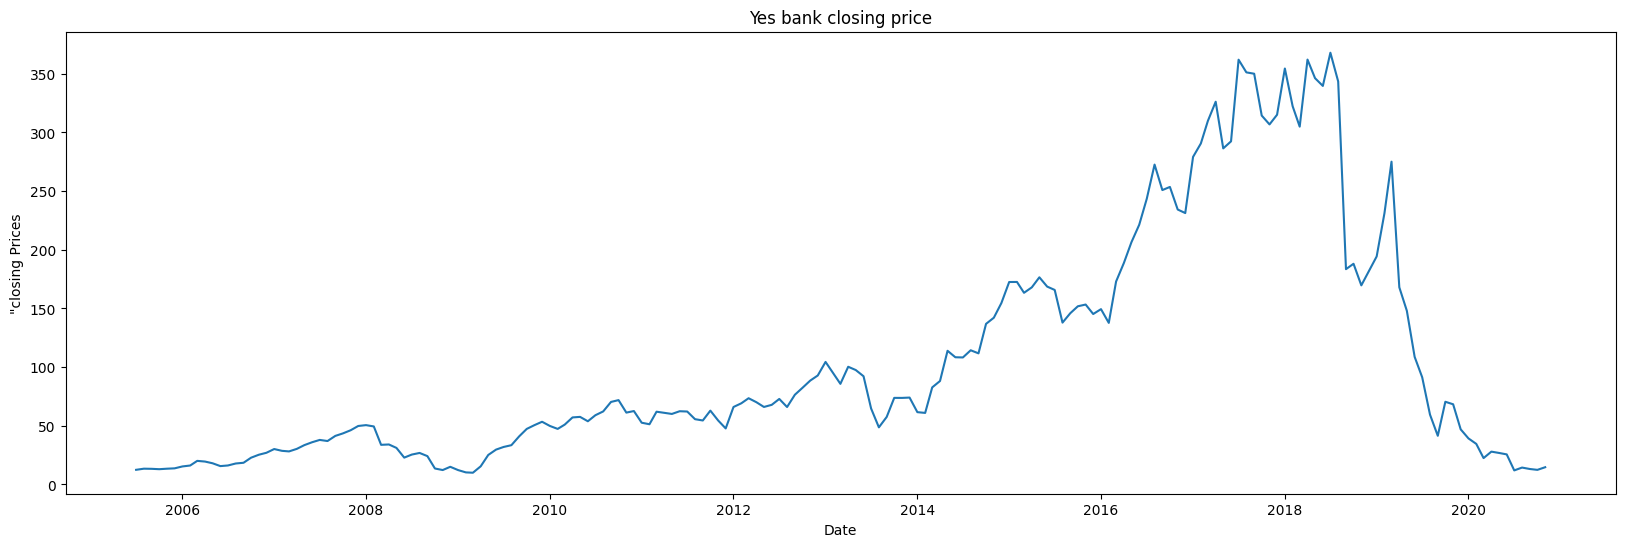

In [ ]:
plt.figure(figsize=(20,6))
plt.xlabel('Date')
plt.ylabel('"closing Prices')
plt.plot(dataset['Close'])
plt.title('Yes bank closing price')
plt.show()

In the graph provided above, it is evident that the stock's closing price experienced a significant decrease after the year 2018. This decline can be attributed primarily to the Rana Kapoor case, which had a detrimental impact on the stock price.

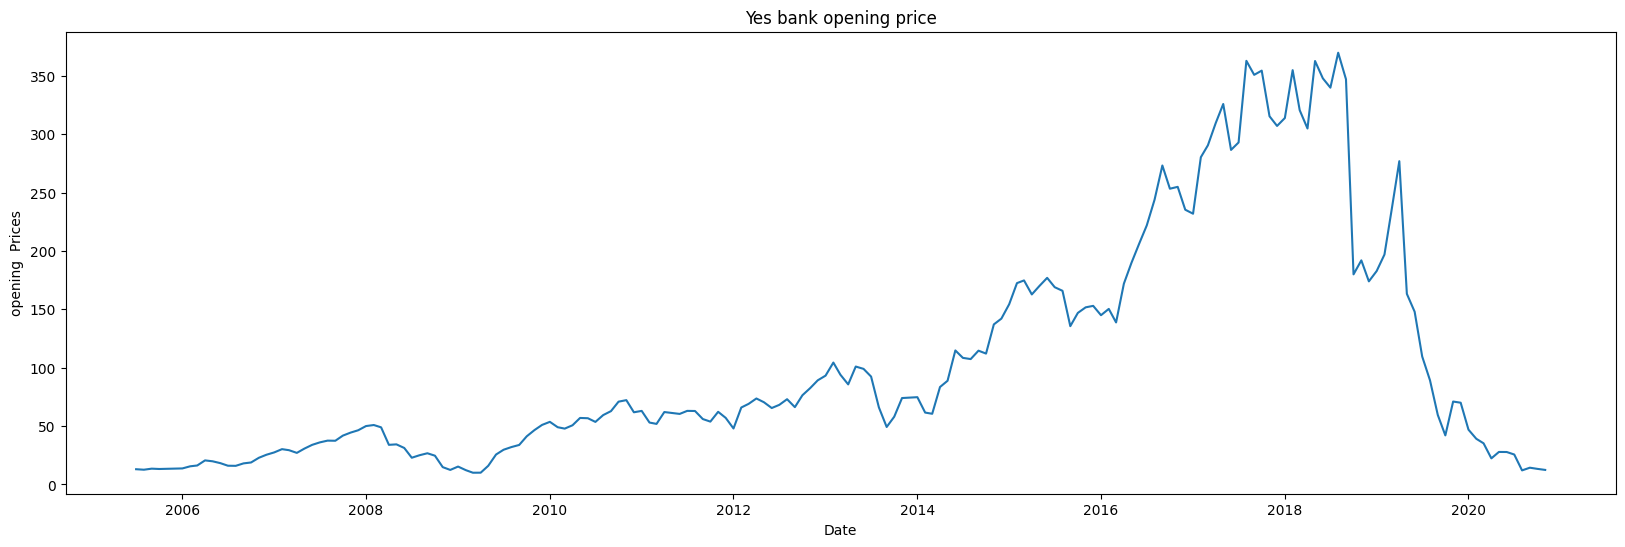

In [ ]:
plt.figure(figsize=(20,6))
plt.xlabel('Date')
plt.ylabel('opening  Prices')
plt.plot(dataset['Open'])
plt.title('Yes bank opening price')
plt.show()

It's apparent from the graph that the opening price and closing price of Yes Bank exhibit similar trends. Both prices started increasing around the year 2014, reaching a peak in 2018. However, after 2018, both prices began a continuous decline, ultimately reaching zero in 2020. This parallel movement between the opening and closing prices suggests a strong correlation between these two variables and further underscores the impact of external factors, such as the Rana Kapoor case, on Yes Bank's stock performance.

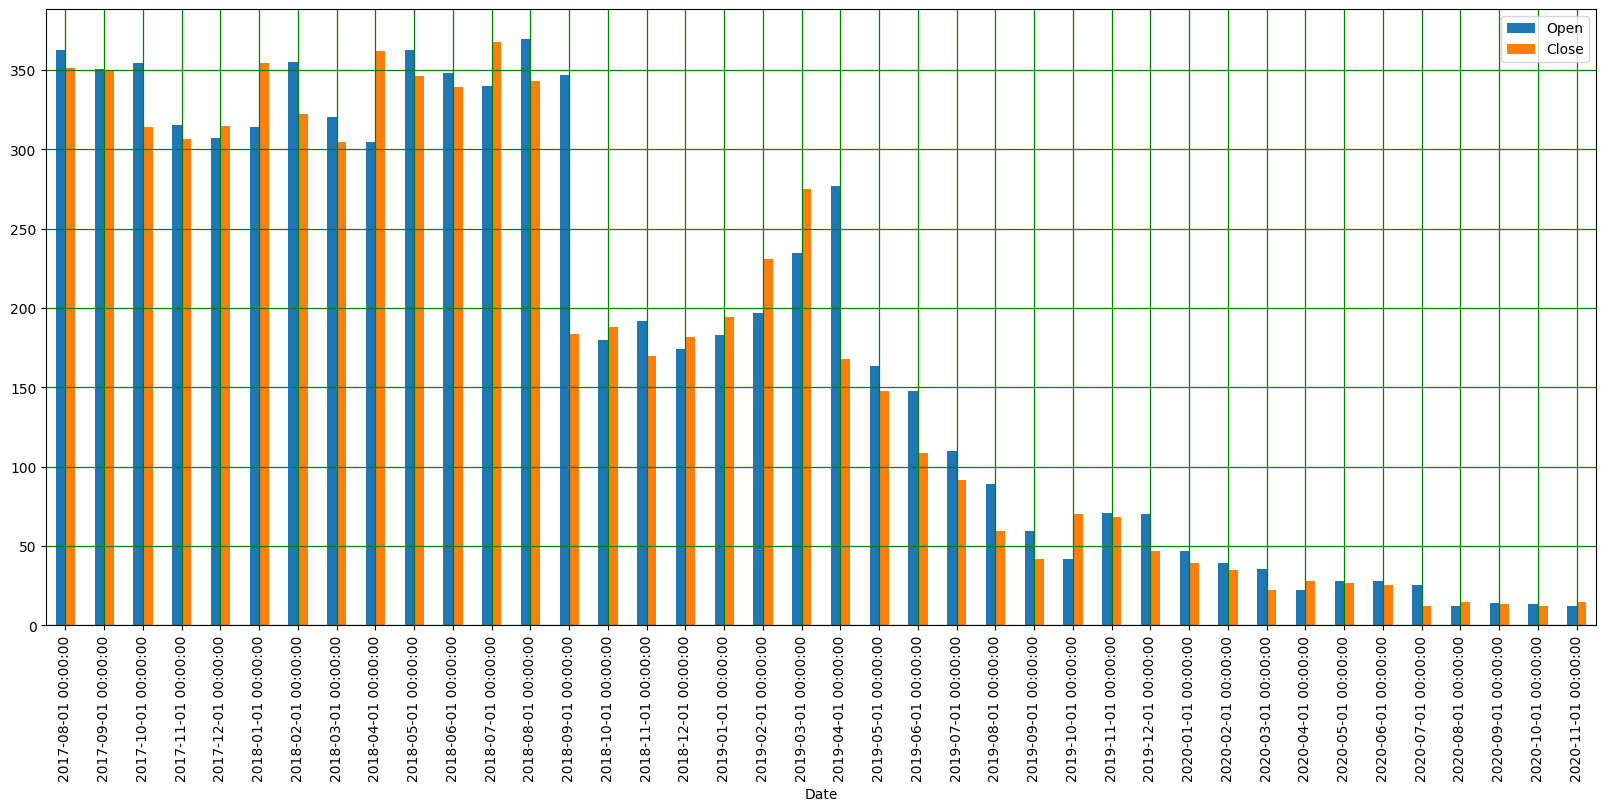

In [ ]:
#Plot Open vs Close
dataset[['Open','Close']].tail(40).plot(kind='bar',figsize=(20,8))
plt.grid(which='major', linestyle='-', linewidth='0.9', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.9', color='red')
plt.show()

From the presented graph, it is evident that the stock price of YES BANK experienced a notable decline after the year 2018. This downward trend may raise concerns for investors considering investment in the company. However, it's essential to conduct a thorough analysis, considering various factors such as market conditions, financial performance, and future prospects, before arriving at a definitive conclusion regarding the investment viability of YES BANK.

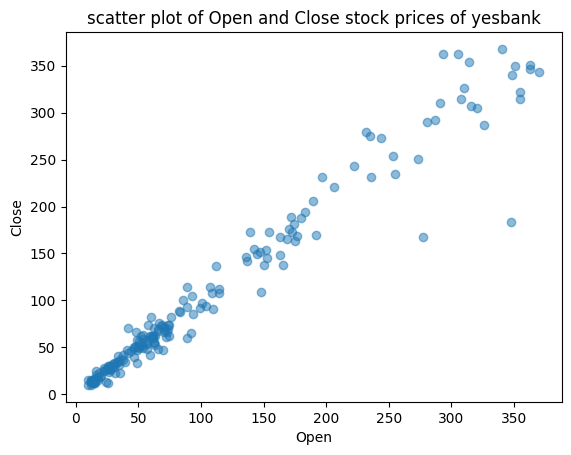

In [ ]:
plt.scatter(dataset['Open'],dataset['Close'],alpha = 0.5)
plt.title('scatter plot of Open and Close stock prices of yesbank')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

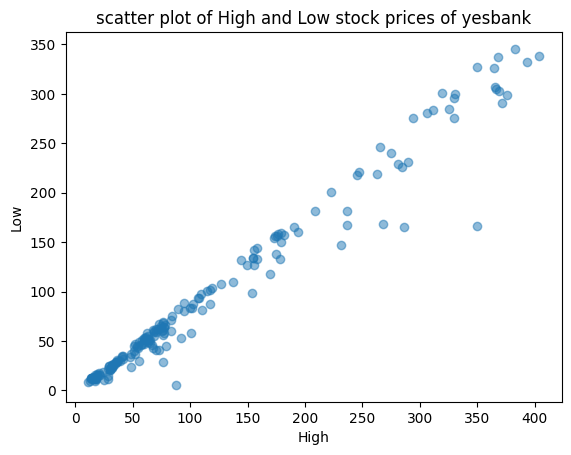

In [ ]:
plt.scatter(dataset['High'],dataset['Low'],alpha = 0.5)
plt.title('scatter plot of High and Low stock prices of yesbank')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

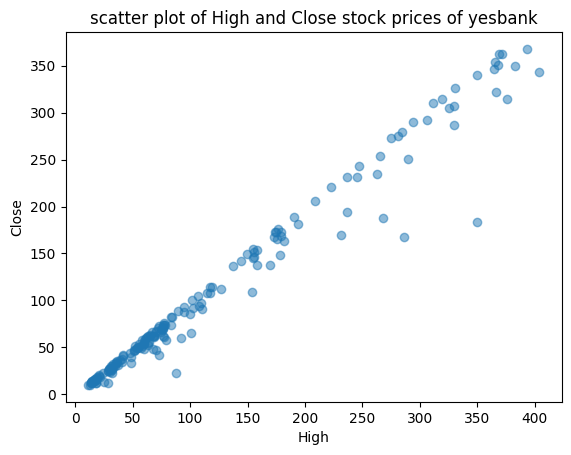

In [ ]:
plt.scatter(dataset['High'],dataset['Close'],alpha = 0.5)
plt.title('scatter plot of High and Close stock prices of yesbank')
plt.xlabel('High')
plt.ylabel('Close')
plt.show()

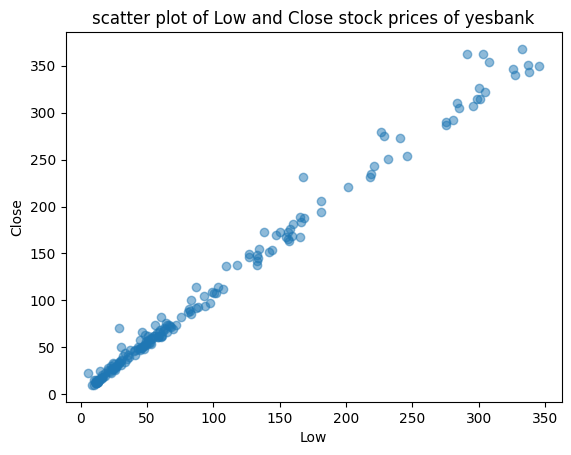

In [ ]:
plt.scatter(dataset['Low'],dataset['Close'],alpha = 0.5)
plt.title('scatter plot of Low and Close stock prices of yesbank')
plt.xlabel('Low')
plt.ylabel('Close')
plt.show()

The scatter plots provided above indicate a high correlation between the closing price and other features in the dataset. Additionally, there seems to be a correlation among the other features themselves. This observation suggests that bivariate analysis reveals significant interrelationships between the closing price and other variables, as well as among the independent variables.

<ipython-input-24-bb4088ac380d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Close'],color="b")


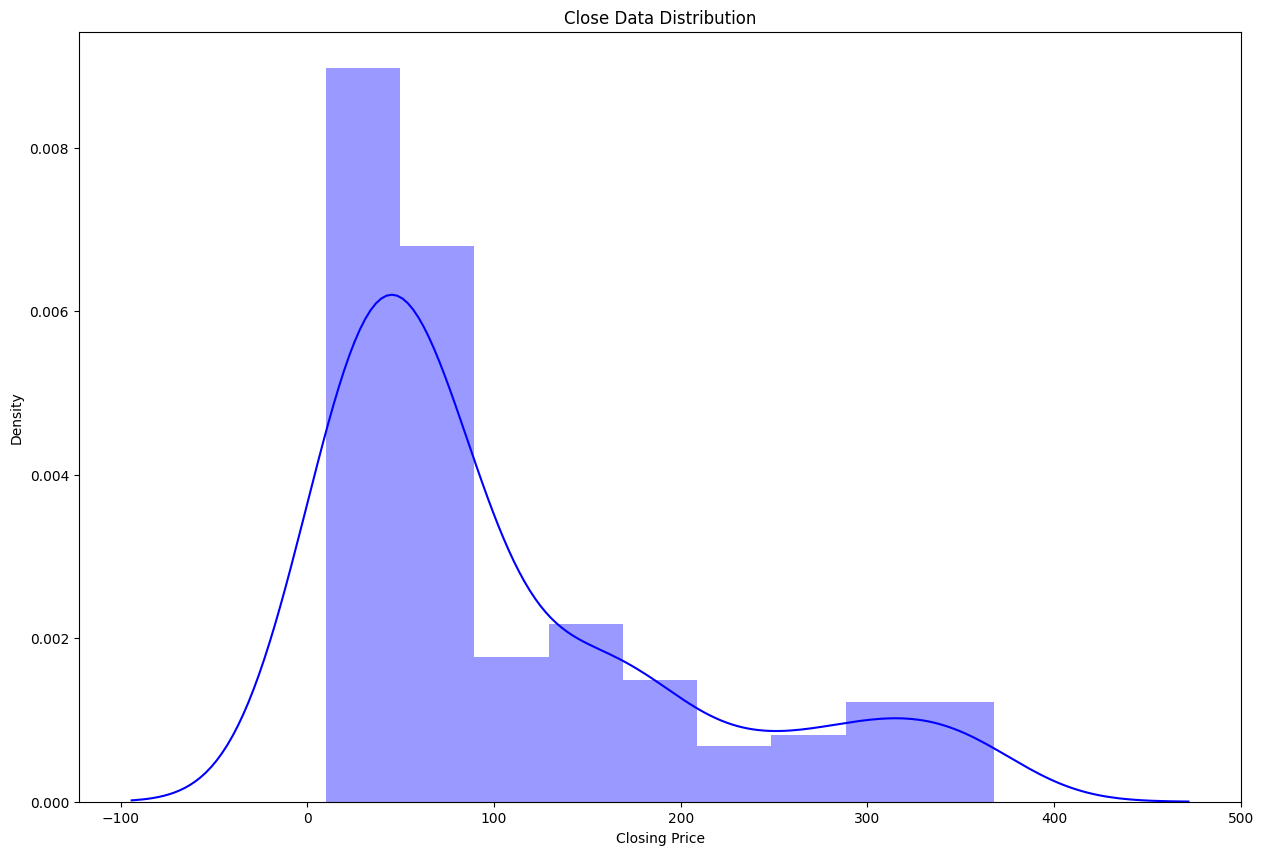

In [ ]:
fig=plt.figure(figsize=(15,10))
sns.distplot(dataset['Close'],color="b")
plt.title('Close Data Distribution')
plt.xlabel('Closing Price')
plt.show()

<ipython-input-25-fcf379ba18cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Open'],color="r")


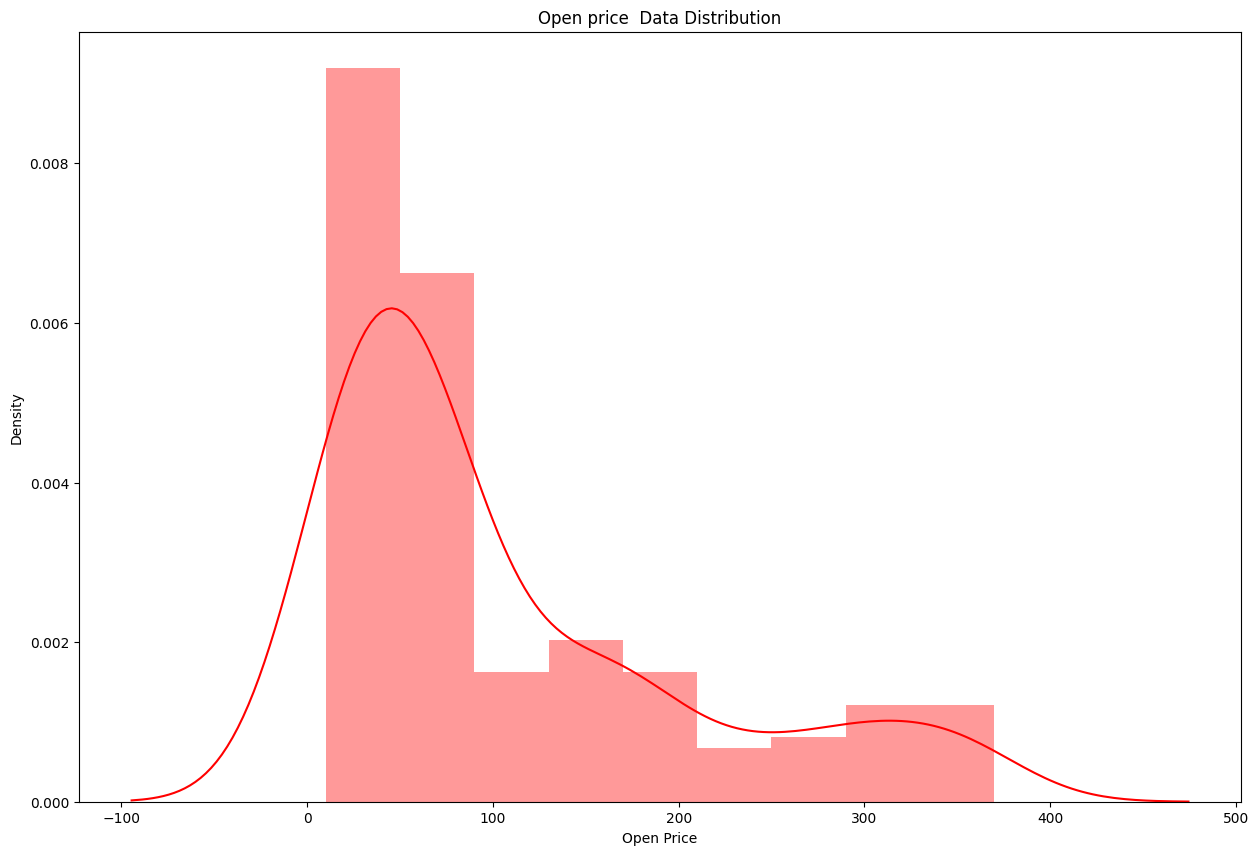

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset['Open'],color="r")
plt.title('Open price  Data Distribution')
plt.xlabel('Open Price')
plt.show()

<ipython-input-26-e0276cc65b6e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['High'],color="g")


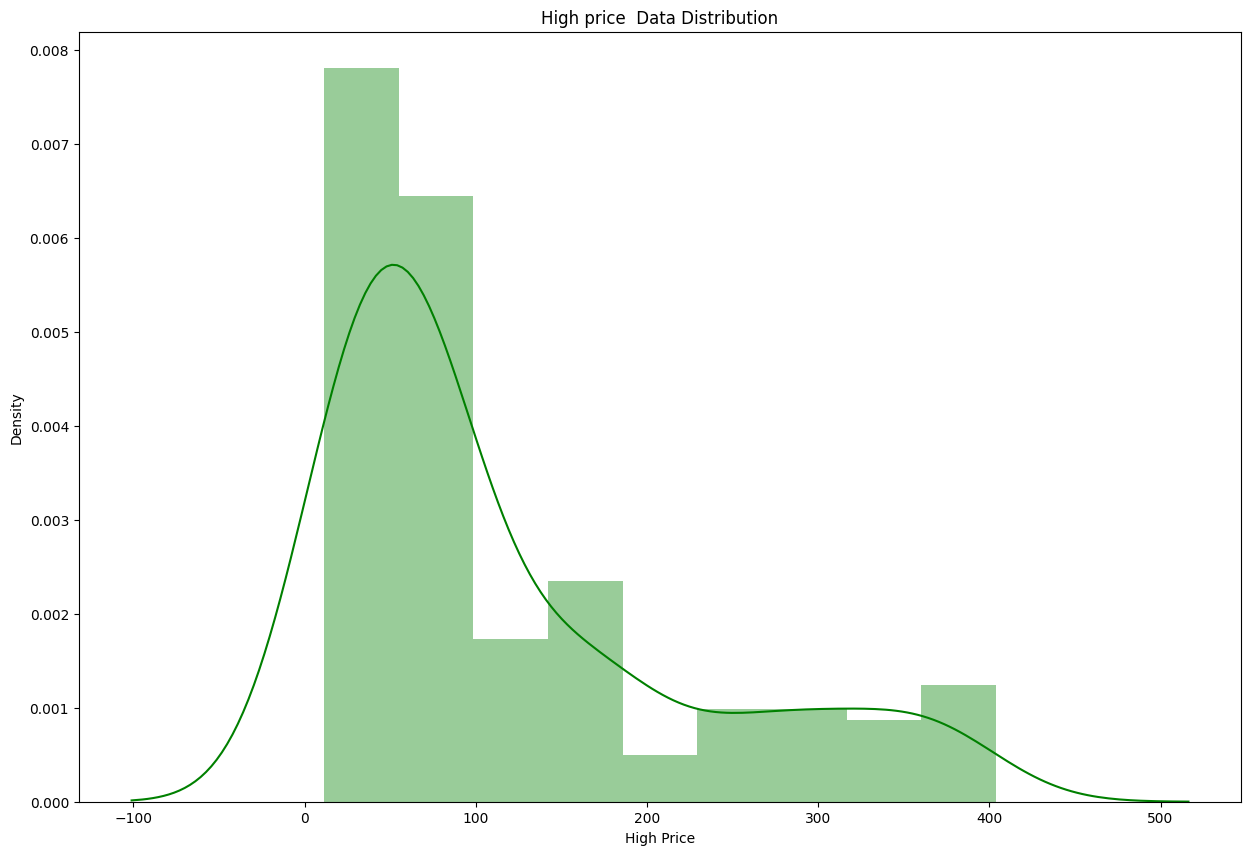

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset['High'],color="g")
plt.title('High price  Data Distribution')
plt.xlabel('High Price')
plt.show()


<ipython-input-28-0e74fc60c6b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Low'],color="c")


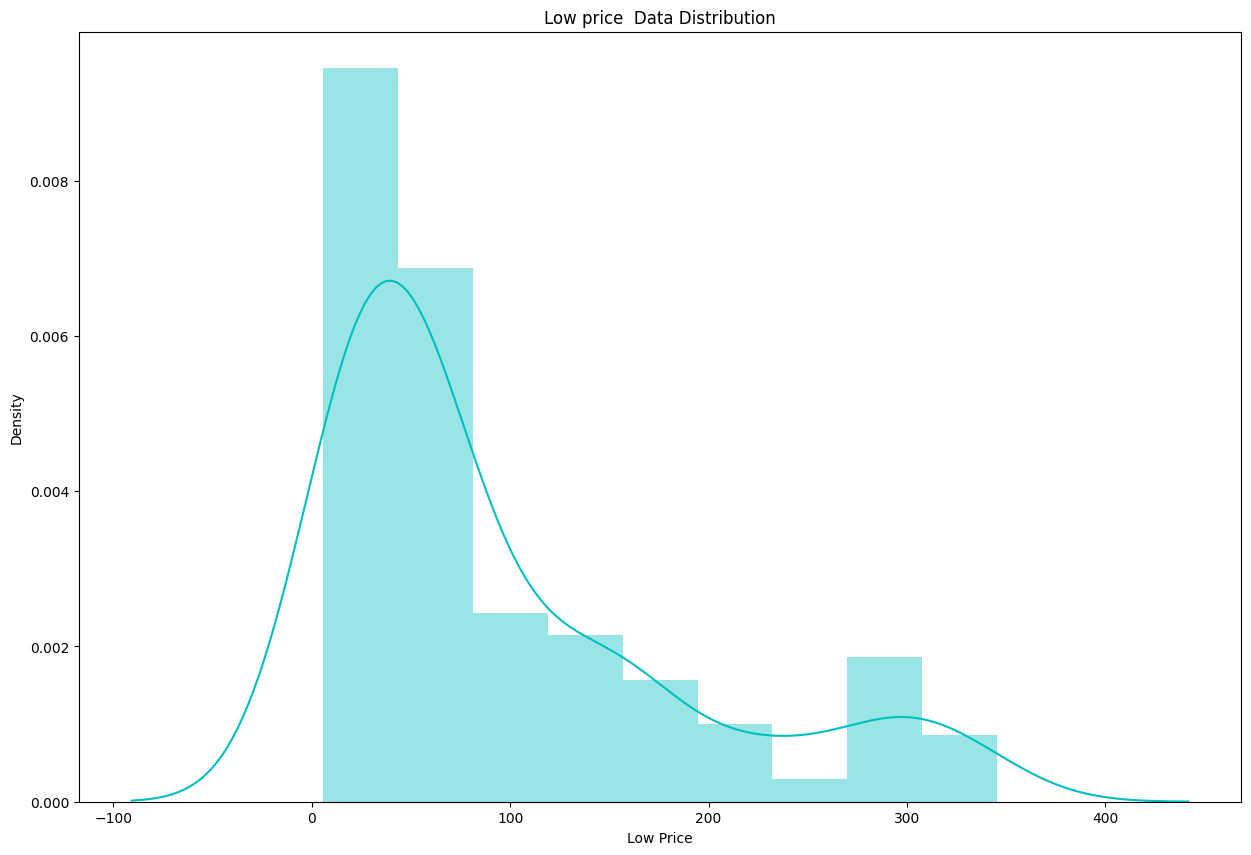

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(dataset['Low'],color="c")
plt.title('Low price  Data Distribution')
plt.xlabel('Low Price')
plt.show()

It is apparent from the histogram plots that all the distributions are right-skewed. This skewness indicates that the majority of the data points are concentrated towards the lower end of the range, with relatively fewer extreme values towards the higher end.

<Axes: >

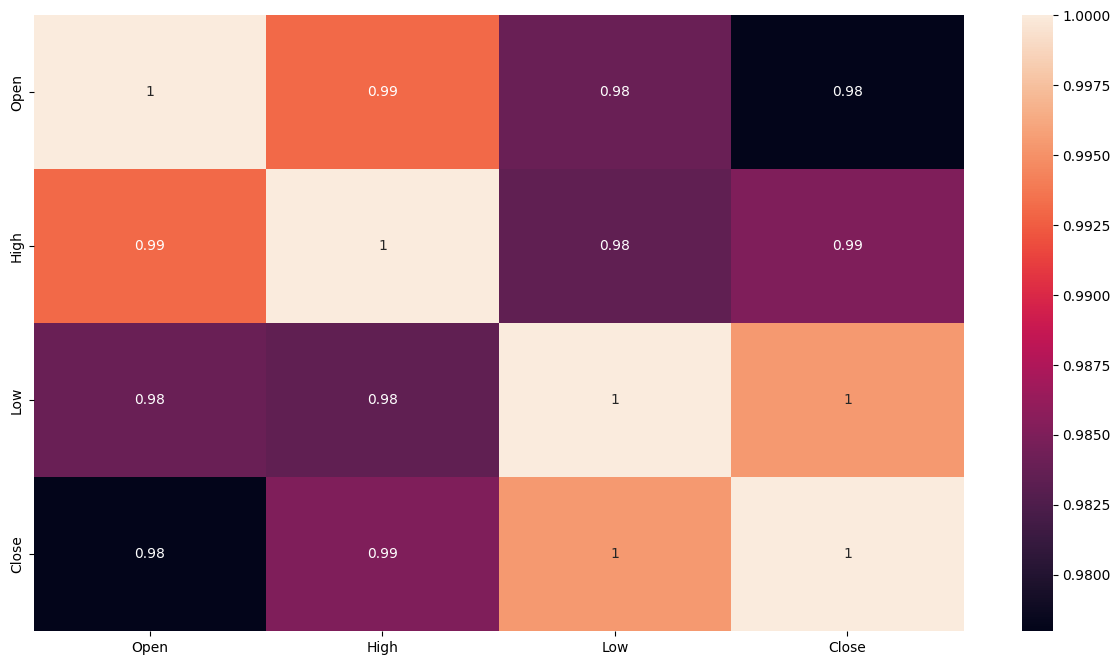

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(), annot= True)

From the heatmap visualization, it's apparent that all the features exhibit high correlation with each other. This indicates the presence of multicollinearity, which can affect the performance and interpretability of regression models. To address multicollinearity, we can utilize techniques such as Principal Component Analysis (PCA) or Ridge Regression.

For our analysis, we will employ Lasso and Ridge Regression techniques.

**DATA MODELING:**

In our approach, we will utilize the Linear Regression algorithm for building our predictive model. Linear Regression is a statistical method used for predictive analysis, demonstrating a linear relationship between a dependent variable and one or more independent variables. This method is aptly named due to its ability to model such linear relationships.

By employing Linear Regression, we aim to predict the closing price of the stock based on the provided features in the dataset. However, it's important to note that the presence of multicollinearity may affect the model's performance, hence the consideration of regularization techniques like Lasso and Ridge Regression. These techniques help mitigate the effects of multicollinearity and improve the robustness of the model.

In [ ]:
#Creating set of numerical features.
numerical_columns=list(dataset.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In the preprocessing step, we have converted numerical data types (int64 and float64) into object data type. This transformation allows us to categorize these columns into dependent and independent variables for further analysis and modeling.

In [ ]:
dependent_variable = 'Close'

In [ ]:
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [ ]:
independent_variables

['Open', 'Low', 'High']

In [ ]:
# Creating data of independent variables
X = dataset[independent_variables].values

# Creating dependent variable data
y = dataset[dependent_variable].values

In [ ]:
dataset[independent_variables]

,Open,Low,High
Date,,,
2005-07-01,13.00,11.25,14.00
2005-08-01,12.58,12.55,14.88
2005-09-01,13.48,12.27,14.87
2005-10-01,13.20,12.40,14.47
2005-11-01,13.35,12.88,13.88
...,...,...,...
2020-07-01,25.60,11.10,28.30
2020-08-01,12.00,11.85,17.16
2020-09-01,14.30,12.75,15.34


In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [ ]:
X_train[:,0]

array([ 56.7 ,  62.9 , 169.  , 363.  , 170.  ,  25.4 ,  13.49, 189.8 ,
       135.61, 104.41,  56.94, 100.99, 150.4 , 347.2 , 180.  , 153.  ,
        68.15, 154.4 ,  24.6 ,  44.4 ,  10.  ,  93.2 ,  33.9 ,  41.2 ,
        27.4 ,  62.  ,  39.1 , 305.  ,  58.  ,  16.  , 151.73, 174.  ,
       147.95, 114.8 ,  71.  , 142.08,  15.9 , 177.  , 277.  ,  10.04,
       197.  ,  22.85, 315.5 ,  70.  , 355.  ,  89.2 , 114.6 ,  14.3 ,
        99.  , 192.  ,  53.8 ,  27.  ,  13.3 ,  13.48,  61.26,  73.  ,
       231.98,  13.68,  49.2 ,  13.  , 286.66,  57.  ,  61.8 ,  49.  ,
       137.1 ,  82.54, 253.41,  15.94,  62.8 ,  56.  ,  94.  , 354.6 ,
        42.  ,  76.4 ,  25.6 , 146.96,  19.8 ,  34.3 ,  48.9 , 320.7 ,
        26.68,  65.45,  27.8 ,  12.41,  41.8 ,  74.  ,  33.89,  61.54,
        53.  ,  20.56, 109.6 ,  60.52,  59.5 , 112.1 ,  46.9 ,  72.2 ,
        18.78,  12.4 , 314.  , 107.4 ,  69.  ,  46.58,  37.4 ,  62.2 ,
        12.19,  35.98,  13.2 ,  89.2 ,  31.98, 206.4 ,  35.2 ,  49.99,
      

In [ ]:
#Looking for shapes of trainig and testing dataset
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


In [ ]:
#Applying linear regression model
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#prediction
y_pred=lr_model.predict(X_test)

In [ ]:
print('Coefficients: ', lr_model.coef_)

Coefficients:  [-0.49613547  0.99944007  0.52549199]


In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

Mean squared error: 19.99


In [ ]:
print('intercept:', lr_model.intercept_)

intercept: 1.48957553743341


In [ ]:
print("R2 score : %.2f" % metrics.r2_score(y_test,y_pred))

R2 score : 1.00


In [ ]:
print('Variance score: {}'.format(lr_model.score(X_test, y_test)))

Variance score: 0.9978412541225983


In [ ]:
print('adjusted R2:',1 - (1-lr_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

adjusted R2: 0.9949781468214299


 R-squared (R2) is a statistical measure that represents the proportion of the variance in the dependent variable (response variable) that is explained by the independent variables (predictor variables) in a regression model. It provides an indication of how well the independent variables explain the variability of the dependent variable. The R2 value ranges from 0 to 1, where 0 indicates that the independent variables do not explain any of the variability in the dependent variable, and 1 indicates that the independent variables explain all the variability in the dependent variable.

In summary, both R-squared and adjusted R-squared are important metrics for evaluating the performance and goodness-of-fit of regression models, with adjusted R-squared being more suitable for models with multiple predictors.

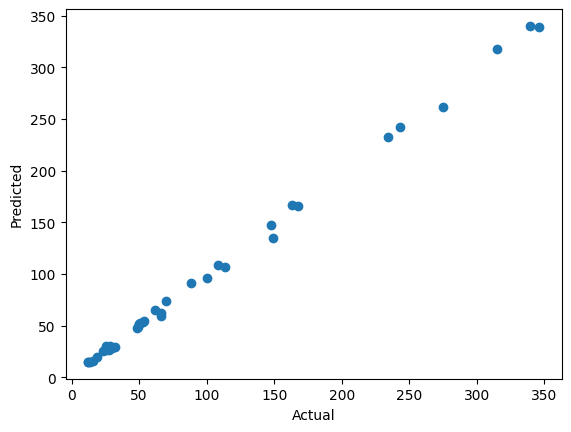

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

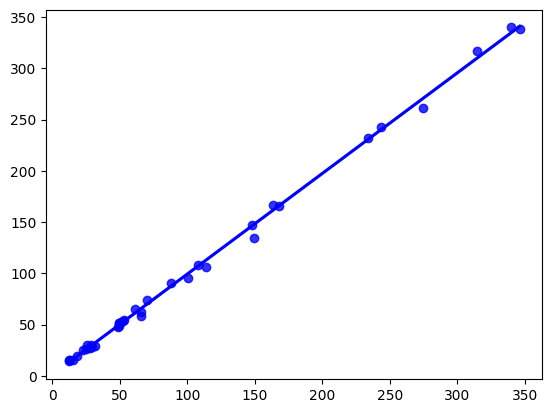

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue');

RESIDUAL PLOT

We are ploting residual plot to evaluate the goodness of our fit for our regression model.

A residual plot is a graphical tool used to evaluate the goodness of fit for a regression model. It displays the residuals, which are the differences between the observed values of the dependent variable and the values predicted by the regression model, against the predicted values themselves.

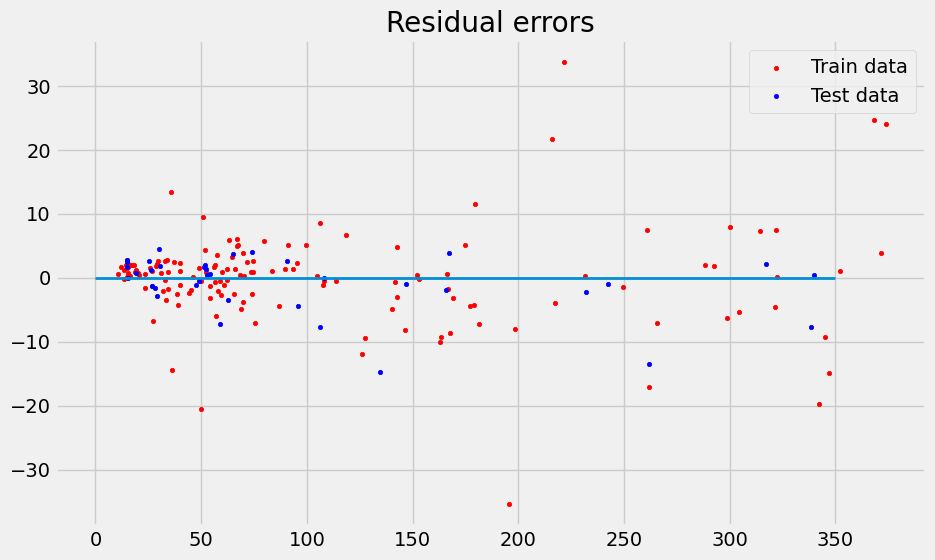

In [ ]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,6))
# plotting residual errors in training data
plt.scatter(lr_model.predict(X_train), lr_model.predict(X_train) - y_train,
            color = "red", s = 10, label = 'Train data')

# plotting residual errors in test data
plt.scatter(lr_model.predict(X_test), lr_model.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

# plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 350, linewidth = 2)


plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

In a residual plot, each point represents the difference between the observed actual value and the corresponding predicted value from the regression model. A high density of points close to the origin and a symmetric distribution around the origin indicate that the model's predictions closely align with the actual data.

To address potential overfitting and improve the model's generalization performance, we can apply Lasso Regression. Lasso Regression is a regularization technique that penalizes the absolute size of the coefficients, effectively shrinking some of them towards zero. This encourages sparsity in the model and helps prevent overfitting by reducing the impact of less relevant features.

By applying Lasso Regression, we aim to enhance the robustness of the model while retaining its predictive accuracy. This regularization technique can help improve the model's performance, particularly in scenarios where overfitting is a concern.

In [ ]:
#Applying Lasso Regression model
lasso  = Lasso(alpha=0.010 , max_iter= 3000)

In [ ]:
#Fitting lasso model
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, max_iter=3000)

In [ ]:
# prediction for lasso model
y_pred_l = lasso.predict(X_test)

In [ ]:
#performance metrics
print("MSE :",mean_squared_error(y_test, y_pred_l))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_l)))
print("MAE :",mean_absolute_error(y_test, y_pred_l))
print("R2 :",metrics.r2_score(y_test, y_pred_l))

MSE : 19.990817202280716
RMSE : 4.471109169130264
MAE : 3.0530116626630526
R2 : 0.9978410123551685


After applying the Lasso regression model, we achieved an R-squared value of 99.7%, indicating a high level of accuracy in predicting the target variable.


CROSS VALIDATION :
Cross-validation involves splitting the dataset into multiple subsets, fitting the model on a portion of the data, and then evaluating its performance on the remaining data. This process helps estimate the model's performance on unseen data and provides a more reliable assessment of its predictive capabilities.


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,0.05,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.287e+03, tolerance: 1.040e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.216e+03, tolerance: 1.024e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.454e+03, tolerance: 8.019e

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 0.05, 1, 5, 10, 20, 30, 40,
                                   45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -59.20898952705562


In [ ]:
#prediction
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",metrics.r2_score(y_test, y_pred_lasso))

MSE : 20.225062395765573
RMSE : 4.497228301494775
MAE : 3.0761757271349555
R2 : 0.997815714115808


Conclusion:

The R-squared value obtained for the test data is 99.7%, which closely matches the score achieved on the training dataset. This consistency indicates that our model performs well and has good generalization capabilities.

IMPLEMENTING RIDGE REGRESSION MODEL:-In Ridge Regression, we need to find the optimal penalty coefficient, represented by alpha. As alpha increases, the penalty for coefficients becomes stronger, helping to prevent overfitting by reducing the impact of less relevant features.

In [ ]:
from sklearn.linear_model import Ridge
ridge  = Ridge()

In [ ]:
#Fitting the model
ridge.fit(X_train,y_train)

Ridge()

In [ ]:
#Score
ridge.score(X_train, y_train)

0.9943947124229274

In [ ]:
#Prediction
y_pred_r = ridge.predict(X_test)

In [ ]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_r))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_r)))
print("MAE :",mean_absolute_error(y_test, y_pred_r))
print("R2 :",metrics.r2_score(y_test, y_pred_r))

MSE : 19.989324527172087
RMSE : 4.4709422415383635
MAE : 3.0528133919460076
R2 : 0.9978411735625411


In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,8,6,19,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 8, 6, 19, 20, 21, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 60}

Using  {'alpha': 60}  the negative mean squared error is:  -59.36153077121784


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
# Test performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",metrics.r2_score(y_test, y_pred_ridge))

MSE : 20.03372458568024
RMSE : 4.475904890151291
MAE : 3.055663076640081
R2 : 0.9978363784020042


After implementing Ridge Regression with the optimized parameters, we achieved a best R-squared score of 99.78%. This high level of accuracy indicates that the Ridge Regression model effectively captures the relationship between the independent variables and the target variable. With this improved performance, we can have greater confidence in the model's ability to generalize to new data and make accurate predictions.

PERFORMANCE VISUALIZATION

In [ ]:
#prediction
y_pred_1=lr_model.predict(X_test)

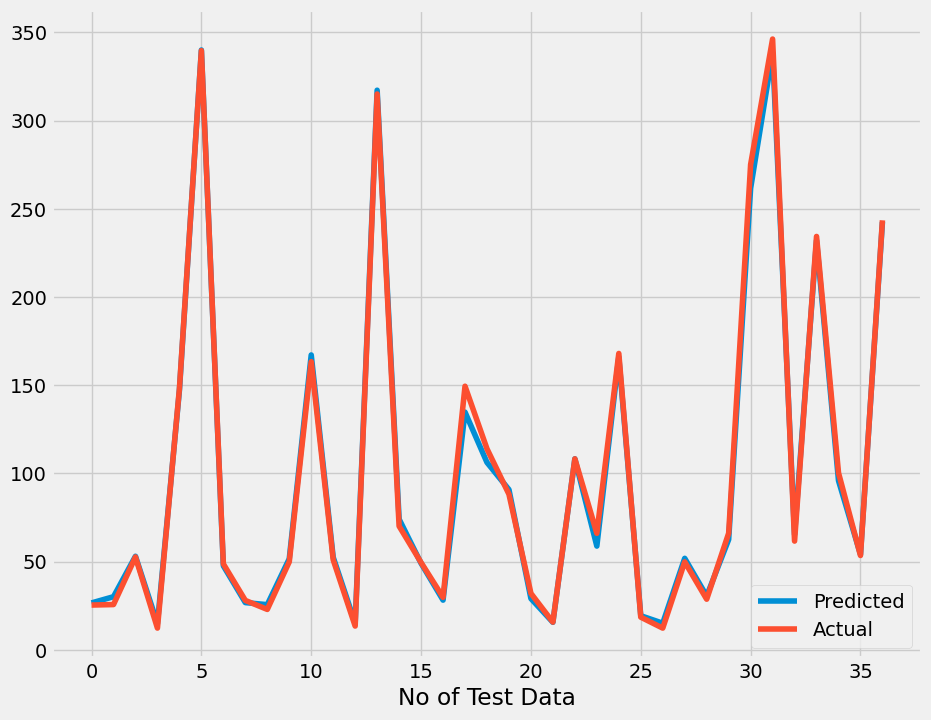

In [ ]:
#Linear regression model performance visualization
plt.figure(figsize=(10,8))
plt.plot(y_pred_1)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

From the analysis conducted, we have derived several insights regarding the dataset:

1. The stock's closing price experienced a significant decline after the year 2018, likely attributed to the Rana Kapoor case, which adversely impacted the stock price.
2. The trends observed in the opening and closing prices of Yes Bank stocks exhibit similar patterns, indicating a strong correlation between these variables.
3. Post-2018, there's a noticeable downward trend in Yes Bank's stock price, suggesting potential concerns for investors considering investment in the company.
4. Bivariate analysis reveals a high correlation between the closing price and other features in the dataset.
5. Histogram plots indicate that the distributions of the features are right-skewed.
6. The heatmap visualization confirms a high correlation among the features, indicating multicollinearity within the dataset.

After conducting exploratory data analysis (EDA), we proceeded to implement a linear regression model. The model achieved an impressive accuracy of 99.78%, indicating its effectiveness in predicting the closing price of Yes Bank stocks.

Furthermore, visual assessment of the model's performance, as depicted in the residual plot, suggests that the linear regression model provides a close approximation to the observed data. This inference is supported by the high R-squared value obtained, indicating a strong fit between the model and the actual data.

In summary, through rigorous data analysis and modeling, we have gained valuable insights into the trends and relationships within the Yes Bank stock dataset, ultimately culminating in the development of a highly accurate predictive model.